In [1]:
# Example of: https://bikeshbade.com.np/tutorials/Detail/?title=Chirps%20Precipitation%20to%20Excel%20-%20GEE%20and%20Pandas&code=14
# import Google earth engine module
import ee

#Authenticate the Google earth engine with google account
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AWtgzh7R8JArSzg95W4fTtq9fK0YK22uAEh7rCxZXzEEHqcCtQlewQZSZ_o



Successfully saved authorization token.


In [2]:
#Pandas modules to interact data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

%matplotlib inline

In [3]:
# import the RS products
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD')
 
# Define time range
startyear = 2019
endyear = 2020

# Set date in ee date format
startdate = ee.Date.fromYMD(startyear,1,1)
enddate = ee.Date.fromYMD(endyear+1,12,31)

 
# create list for years
years = range(startyear,endyear);
print(years)
# make a list with months
months = range(1,13)

#Filter to select Precipitation band
PrecipitationChirps = chirps.filterDate(startdate, enddate).sort('system:time_start', False).select("precipitation")
print(PrecipitationChirps)
# Define geograpic 
point = ee.Geometry.Point([85.68, 26.91])
 
# calculate the monthly Sum
def MonthlySum(imageCollection):
    mylist = ee.List([])
    for y in years:
        print(y)
        for m in months:
            print(m)
            w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).sum()
            #mylist = mylist.add(w)
            mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
    return ee.ImageCollection.fromImages(mylist)
 
# run the calcMonthlyMean function
monthlyChirps = ee.ImageCollection(MonthlySum(PrecipitationChirps))


# select the region of interest, 25000 is the cellsize in meters
monthlyChirps = monthlyChirps.getRegion(point,25000,"epsg:4326").getInfo()
print(monthlyChirps)

# get january (index = 0)
precipiation = pd.DataFrame(monthlyChirps, columns = monthlyChirps[0])
print(precipiation)

# remove the first line
precipiation = precipiation[1:]

#to display the data
print(precipiation[['id','longitude','latitude','precipitation']])


#To export to CSV
precipiation.to_csv (r'precipitation.csv', index = False, header=True)

range(2019, 2020)
ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Image.select",
              "arguments": {
                "bandSelectors": {
                  "constantValue": [
                    "precipitation"
                  ]
                },
                "input": {
                  "argumentReference": "_MAPPING_VAR_0_0"
                }
              }
            }
          }
        }
      },
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.limit",
          "arguments": {
            "ascending": {
              "constantValue": false
            },
            "collection": {
              "functionInvocationValue": {
           

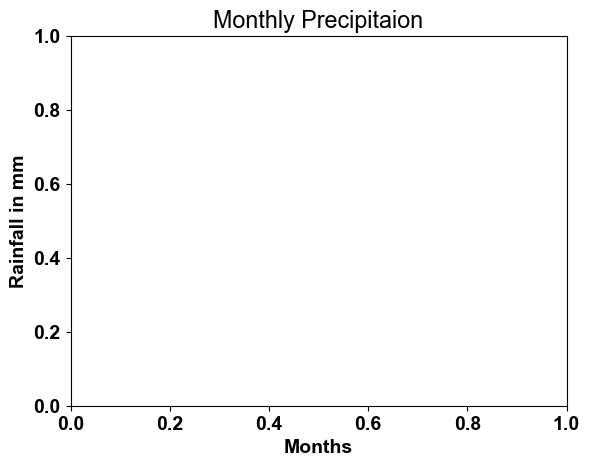

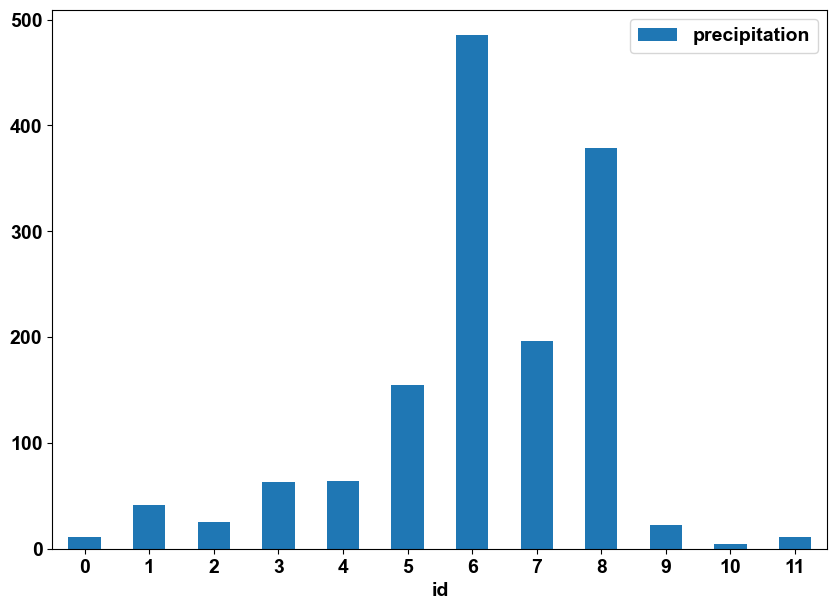

In [4]:
# To display the data in the chart
#style the font size
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

#chart Title
plt.title('Monthly Precipitaion')

#chart lable for x axis
plt.xlabel('Months')

#chart lable for y axis
plt.ylabel('Rainfall in mm')

plt.rcParams["figure.figsize"] = (10,7)

ax = precipiation.plot.bar(x='id', y='precipitation', rot=0)

#export chart as png
plt.savefig('precipitation.png')